##### This dataset was obtained by bouncing sonar off of rock and metal cylinders (mines), with the objective of being able to use the sonar to accurately determine which items are which. The dataset has 60 features (sensors), so perhaps algorithms which inherently select for features will perform best. I will try some traditional classification algorithms along with feature selection as well.

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/sonar-returns/sonar.csv")
df.head().transpose()

,0,1,2,3,4
f1,0.02,0.0453,0.0262,0.01,0.0762
f2,0.0371,0.0523,0.0582,0.0171,0.0666
f3,0.0428,0.0843,0.1099,0.0623,0.0481
f4,0.0207,0.0689,0.1083,0.0205,0.0394
f5,0.0954,0.1183,0.0974,0.0205,0.059
...,...,...,...,...,...
f57,0.018,0.014,0.0316,0.005,0.0072
f58,0.0084,0.0049,0.0164,0.0044,0.0048
f59,0.009,0.0052,0.0095,0.004,0.0107
f60,0.0032,0.0044,0.0078,0.0117,0.0094


# Exploratory Data Analysis

In [3]:
shape = df.shape
print(shape)

(208, 61)


In [4]:
class_counts = df.groupby('class').size()
print(class_counts)

class
M    111
R     97
dtype: int64


##### A heatmap shows that sensors nearby each other often have correlation. This makes sense given physical proximity, and the physical nature of the problem

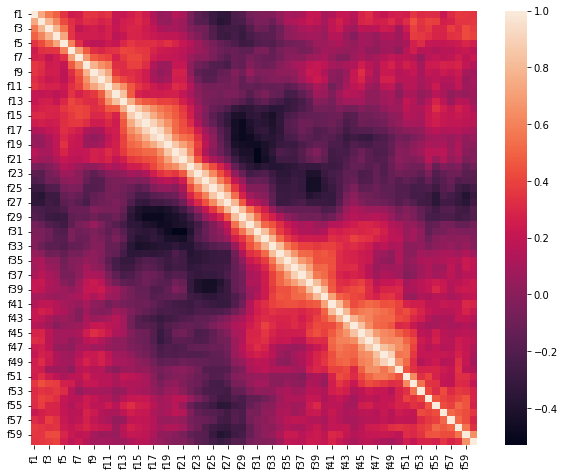

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

##### A box plot shows that sensors near the middle of the list show the greatest range and variation, whereas sensors near the beginning and end of the list show very little variation.

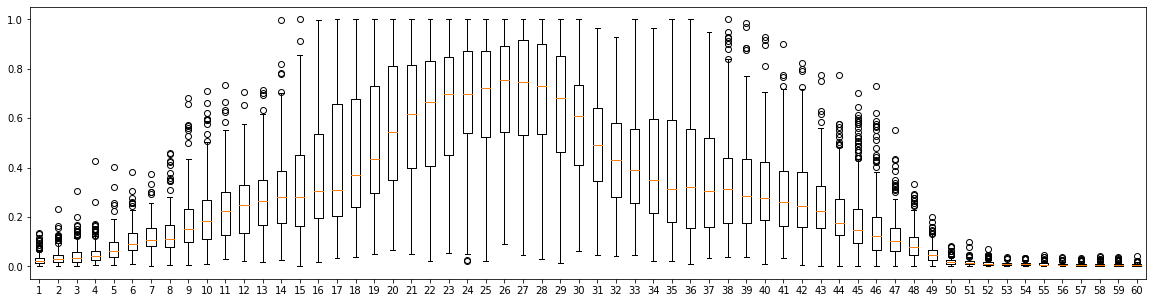

In [6]:
plt.figure(figsize=(20,5))
plt.boxplot(df.drop(columns="class"))
plt.show()

# Preprocessing

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['class'])
transform = le.transform(df['class'])
df['class'] = transform
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: class, Length: 208, dtype: int64

In [8]:
array = df.values
numcols = len(df.columns)
X = array[:,0:numcols-1]
y = array[:,numcols-1:numcols]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=123)

# Models Spot-Check

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [11]:
num_folds = 100
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('XGB', XGBClassifier()))

In [12]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.77 (0.37)
LDA: 0.74 (0.40)
KNN: 0.69 (0.40)
CART: 0.67 (0.40)
NB: 0.67 (0.41)
SVM: 0.54 (0.43)
AB: 0.69 (0.42)
GBM: 0.80 (0.35)
RF: 0.82 (0.34)
ET: 0.81 (0.37)
BG: 0.70 (0.40)
[18:03:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:16] WARNING: ../src/learner.cc:1115: Starting in XGBoos

# Impact of Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.79 (0.36)
LDA: 0.77 (0.37)
KNN: 0.79 (0.36)
CART: 0.63 (0.42)
NB: 0.66 (0.41)
SVM: 0.82 (0.33)
AB: 0.72 (0.40)
GBM: 0.81 (0.35)
RF: 0.79 (0.36)
ET: 0.86 (0.30)
BG: 0.80 (0.34)
[18:05:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:18] WARNING: ../src/learner.cc:1115: Starting in XGBoos

# Feature Selection

### F-Statistic Based Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=30)
X_kbest_ftest = fvalue_selector.fit_transform(X_train, y_train)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest_ftest.shape[1])

Original number of features: 60
Reduced number of features: 30


In [16]:
sc = StandardScaler()
X_kbest_ftest_std = sc.fit_transform(X_kbest_ftest)

In [17]:
models = []
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    if name == "SVM":
        training_data = X_kbest_ftest_std
    else:
        training_data = X_kbest_ftest
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, training_data, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.77 (0.38)
AB: 0.71 (0.39)
GBM: 0.77 (0.37)
ET: 0.83 (0.31)
[18:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglos

### Chi-Squared Based Feature Selection

In [18]:
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=30)
X_kbest_chitest = chi2_selector.fit_transform(X_train, y_train)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest_chitest.shape[1])

Original number of features: 60
Reduced number of features: 30


In [19]:
sc = StandardScaler()
X_kbest_chitest_std = sc.fit_transform(X_kbest_chitest)

In [20]:
results = []
names = []
for name, model in models:
    if name == "SVM":
        training_data = X_kbest_chitest_std
    else:
        training_data = X_kbest_chitest
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, training_data, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.77 (0.36)
AB: 0.74 (0.38)
GBM: 0.75 (0.38)
ET: 0.83 (0.33)
[18:08:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglos

### Variance Threshold Based Feature Selection

In [21]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.05)
X_kbest_vartest = thresholder.fit_transform(X_train)
print(X_kbest_vartest.shape)

(145, 18)


In [22]:
sc = StandardScaler()
X_kbest_vartest_std = sc.fit_transform(X_kbest_vartest)

In [23]:
results = []
names = []
for name, model in models:
    if name == "SVM":
        training_data = X_kbest_vartest_std
    else:
        training_data = X_kbest_vartest
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, training_data, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.72 (0.39)
AB: 0.60 (0.42)
GBM: 0.70 (0.39)
ET: 0.80 (0.36)
[18:09:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglos

### PCA Feature Extraction

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
X_kbest_pca = pca.fit_transform(X_train)
X_kbest_pca.shape

(145, 17)

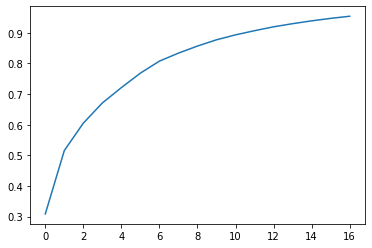

In [25]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance);

In [26]:
sc = StandardScaler()
X_kbest_pca_std = sc.fit_transform(X_kbest_pca)

In [27]:
results = []
names = []
for name, model in models:
    if name == "SVM":
        training_data = X_kbest_pca_std
    else:
        training_data = X_kbest_pca
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, training_data, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.80 (0.35)
AB: 0.72 (0.41)
GBM: 0.77 (0.38)
ET: 0.79 (0.38)
[18:10:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglos

# Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

### SVM

In [29]:
c = np.array([1,0.1,0.001,0.0001])
kernel = np.array(['linear', 'poly', 'rbf', 'sigmoid'])
gamma = np.array(['scale', 'auto'])
class_weight = np.array(['balanced', None])

param_grid = dict(C=c, kernel=kernel, gamma=gamma, class_weight=class_weight)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=60)
grid.fit(X_kbest_pca_std, y_train)

SVM_c = grid.best_estimator_.C
SVM_kernel = grid.best_estimator_.kernel
SVM_gamma = grid.best_estimator_.gamma
SVM_class_weight = grid.best_estimator_.class_weight

print("SVM")
print("Best Score: %.3f" % grid.best_score_)

print(SVM_c)
print(SVM_kernel)
print(SVM_gamma)
print(SVM_class_weight)

SVM
Best Score: 0.817
1.0
rbf
scale
balanced


### Adaboost

In [30]:
n_est = np.array([5,10,20,30,40,50])
learning_rate = np.array([1,0.1,0.001,0.0001])
algorithm = np.array(['SAMME', 'SAMME.R'])

param_grid = dict(n_estimators=n_est, learning_rate=learning_rate, algorithm=algorithm)
model = AdaBoostClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

AB_n_estimators = grid.best_estimator_.n_estimators
AB_learning_rate = grid.best_estimator_.learning_rate
AB_algorithm = grid.best_estimator_.algorithm

print("Adaboost")
print("Best Score: %.3f" % grid.best_score_)

print(AB_n_estimators)
print(AB_learning_rate)
print(AB_algorithm)

Adaboost
Best Score: 0.793
50
1.0
SAMME.R


### Gradient Boosting

In [31]:
n_est = np.array([25,50,75,100,125])
learning_rate = np.array([1,0.1,0.001,0.0001])
criterion = np.array(['friedman_mse', 'squared_error', 'mse', 'mae'])
loss = np.array(['deviance', 'exponential'])

param_grid = dict(n_estimators=n_est, learning_rate=learning_rate, criterion=criterion, loss=loss)
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X_kbest_chitest, y_train)

GB_n_estimators = grid.best_estimator_.n_estimators
GB_learning_rate = grid.best_estimator_.learning_rate
GB_criterion = grid.best_estimator_.criterion
GB_loss = grid.best_estimator_.loss

print("Gradient Boosting")
print("Best Score: %.3f" % grid.best_score_)

print(GB_n_estimators)
print(GB_learning_rate)
print(GB_criterion)
print(GB_loss)

Gradient Boosting
Best Score: 0.821
125
1.0
squared_error
deviance


### Random Forest

In [32]:
n_est = np.array([10,20,30,40,50])
criterion = np.array(['gini', 'entropy'])
max_depth = np.array([40,60,80,120,140])
max_leaf_nodes = np.array([140,280,320,360])

param_grid = dict(n_estimators=n_est, criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

RF_n_estimators = grid.best_estimator_.n_estimators
RF_criterion = grid.best_estimator_.criterion
RF_max_depth = grid.best_estimator_.max_depth
RF_max_leaf_nodes = grid.best_estimator_.max_leaf_nodes

print("Random Forest")
print("Best Score: %.3f" % grid.best_score_)

print(RF_n_estimators)
print(RF_criterion)
print(RF_max_depth)
print(RF_max_leaf_nodes)

Random Forest
Best Score: 0.834
40
entropy
40
360


### Extra Trees

In [33]:
n_est = np.array([5,10,20,30,40,50])
criterion = np.array(['gini', 'entropy'])
max_depth = np.array([20,40,60,80,120])
max_leaf_nodes = np.array([240,260,280,300,320])

param_grid = dict(n_estimators=n_est, criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
model = ExtraTreesClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

ET_n_estimators = grid.best_estimator_.n_estimators
ET_criterion = grid.best_estimator_.criterion
ET_max_depth = grid.best_estimator_.max_depth
ET_max_leaf_nodes = grid.best_estimator_.max_leaf_nodes

print("Extra Trees")
print("Best Score: %.3f" % grid.best_score_)

print(ET_n_estimators)
print(ET_criterion)
print(ET_max_depth)
print(ET_max_leaf_nodes)

Extra Trees
Best Score: 0.862
50
entropy
40
260


### XGB

In [34]:
n_est = np.array([10,20,30,40,50])
max_depth = np.array([2,3,4,5,6])
reg_alpha = np.array([1,.1,.01,.001])
reg_lambda = np.array([1,.1,.01,.001])

param_grid = dict(n_estimators=n_est, max_depth=max_depth, reg_alpha=reg_alpha, reg_lambda=reg_lambda)
model = XGBClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

XGB_n_estimators = grid.best_estimator_.n_estimators
XGB_max_depth = grid.best_estimator_.max_depth
XGB_reg_alpha = grid.best_estimator_.reg_alpha
XGB_reg_lambda = grid.best_estimator_.reg_lambda

print("XG Boost")
print("Best Score: %.3f" % grid.best_score_)

print(XGB_n_estimators)
print(XGB_max_depth)
print(XGB_reg_alpha)
print(XGB_reg_lambda)

[18:16:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Performance Upon Test Set

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### SVM

In [36]:
model = SVC(C=SVM_c, 
            kernel=SVM_kernel, 
            gamma=SVM_gamma, 
            class_weight=SVM_class_weight)
model.fit(X_train_std,y_train)

predictions = model.predict(X_test_std)
print("SVM on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

SVM on the Test Set
0.857

Confusion Matrix
[[33  3]
 [ 6 21]]


### SVM with PCA and Standardization

In [37]:
pca = PCA(n_components=.95)
X_kbest_pca = pca.fit_transform(X)

In [38]:
X_kbest_pca, X_test_kbest_pca, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=123)

In [39]:
sc = StandardScaler()
X_kbest_pca_std = sc.fit_transform(X_kbest_pca)
X_test_kbest_pca_std = sc.fit_transform(X_test_kbest_pca)

In [40]:
model = SVC(C=SVM_c, 
            kernel=SVM_kernel, 
            gamma=SVM_gamma, 
            class_weight=SVM_class_weight)
model.fit(X_kbest_pca_std,y_train)

predictions = model.predict(X_test_kbest_pca_std)
print("SVM on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

SVM on the Test Set
0.794

Confusion Matrix
[[30  6]
 [ 7 20]]


### Adaboost

In [41]:
model = AdaBoostClassifier(n_estimators=AB_n_estimators, 
                           learning_rate=AB_learning_rate, 
                           algorithm=AB_algorithm)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Adaboost on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Adaboost on the Test Set
0.905

Confusion Matrix
[[34  2]
 [ 4 23]]


### Gradient Boosting

In [42]:
model = GradientBoostingClassifier(n_estimators=GB_n_estimators, 
                                   criterion=GB_criterion, 
                                   learning_rate=GB_learning_rate, 
                                   loss=GB_loss)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Adaboost on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Adaboost on the Test Set
0.889

Confusion Matrix
[[34  2]
 [ 5 22]]


### Gradient Boosting with Feature Selection

In [43]:
chi2_selector = SelectKBest(chi2, k=30)
X_chi_selected = chi2_selector.fit_transform(X, y)

In [44]:
X_kbest_chitest, X_test_kbest_chitest, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=123)

In [45]:
model = GradientBoostingClassifier(n_estimators=GB_n_estimators, 
                                   criterion=GB_criterion, 
                                   learning_rate=GB_learning_rate, 
                                   loss=GB_loss)
model.fit(X_kbest_chitest,y_train)
predictions = model.predict(X_test_kbest_chitest)
print("Adaboost on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Adaboost on the Test Set
0.889

Confusion Matrix
[[34  2]
 [ 5 22]]


### Random Forest

In [46]:
model = RandomForestClassifier(n_estimators=RF_n_estimators, 
                               criterion=RF_criterion, 
                               max_depth=RF_max_depth, 
                               max_leaf_nodes=RF_max_leaf_nodes)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Adaboost on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Adaboost on the Test Set
0.841

Confusion Matrix
[[34  2]
 [ 8 19]]


### Extra Trees

In [47]:
model = ExtraTreesClassifier(n_estimators=ET_n_estimators, 
                             criterion=ET_criterion, 
                             max_depth=ET_max_depth, 
                             max_leaf_nodes=ET_max_leaf_nodes)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Extra Trees on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Extra Trees on the Test Set
0.889

Confusion Matrix
[[35  1]
 [ 6 21]]


### XGB

In [48]:
model = XGBClassifier(n_estimators=XGB_n_estimators, 
                      max_depth=XGB_max_depth, 
                      reg_alpha=XGB_reg_alpha,
                      reg_lambda=XGB_reg_lambda)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Extra Trees on the Test Set")
print(round(accuracy_score(y_test, predictions),3))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

[18:21:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extra Trees on the Test Set
0.873

Confusion Matrix
[[35  1]
 [ 7 20]]
